In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('customerTargeting.csv')

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6620 entries, 0 to 6619
Data columns (total 71 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   g1_1    6620 non-null   float64
 1   g1_2    6620 non-null   int64  
 2   g1_3    6620 non-null   int64  
 3   g1_4    6620 non-null   int64  
 4   g1_5    6620 non-null   int64  
 5   g1_6    6620 non-null   int64  
 6   g1_7    6620 non-null   int64  
 7   g1_8    6620 non-null   int64  
 8   g1_9    6620 non-null   int64  
 9   g1_10   6620 non-null   int64  
 10  g1_11   6620 non-null   int64  
 11  g1_12   6620 non-null   int64  
 12  g1_13   6620 non-null   float64
 13  g1_14   6620 non-null   float64
 14  g1_15   6620 non-null   float64
 15  g1_16   6620 non-null   float64
 16  g1_17   6620 non-null   float64
 17  g1_18   6620 non-null   float64
 18  g1_19   6620 non-null   float64
 19  g1_20   6620 non-null   float64
 20  g1_21   6620 non-null   float64
 21  g2_1    6620 non-null   float64
 22  

In [4]:
print(data.describe())

              g1_1         g1_2         g1_3         g1_4         g1_5   
count  6620.000000  6620.000000  6620.000000  6620.000000  6620.000000  \
mean      2.708779    14.424018    10.485650    24.909668    10.988066   
std       1.857725    10.700787     8.384203    18.174948     5.635985   
min       1.050000     0.000000     0.000000     0.000000     1.000000   
25%       1.667000     6.000000     4.000000    10.000000     6.000000   
50%       2.150000    13.000000     9.000000    22.000000    11.000000   
75%       2.800000    21.000000    15.000000    36.000000    16.000000   
max      23.000000    52.000000    47.000000    94.000000    20.000000   

              g1_6         g1_7         g1_8         g1_9        g1_10  ...   
count  6620.000000  6620.000000  6620.000000  6620.000000  6620.000000  ...  \
mean     13.412085    10.161027    10.745468    14.169033     3.251057  ...   
std      10.090030     7.495039     7.964247     9.866734     8.481210  ...   
min       0.00000

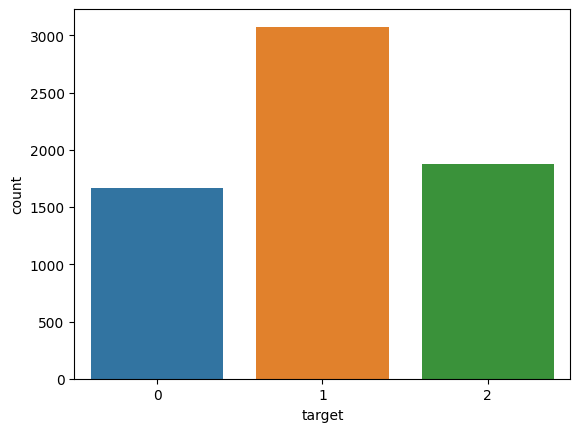

In [5]:
# Visualisasi distribusi kelas target
sns.countplot(x='target', data=data)
plt.show()

In [6]:
# Declare feature vector and target variable
X = data.drop('target', axis=1)
y = data['target']


In [8]:
# Split data into separate training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Run SVM with default hyperparameters
svm_default = SVC()
svm_default.fit(X_train, y_train)
y_pred_default = svm_default.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)
print("Accuracy (Default):", accuracy_default)


Accuracy (Default): 0.5823262839879154


In [11]:
# Run SVM with linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("Accuracy (Linear):", accuracy_linear)

Accuracy (Linear): 0.5740181268882175


In [12]:
# Run SVM with polynomial kernel
svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print("Accuracy (Polynomial):", accuracy_poly)


Accuracy (Polynomial): 0.5400302114803626


In [13]:
# Run SVM with sigmoid kernel
svm_sigmoid = SVC(kernel='sigmoid')
svm_sigmoid.fit(X_train, y_train)
y_pred_sigmoid = svm_sigmoid.predict(X_test)
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
print("Accuracy (Sigmoid):", accuracy_sigmoid)


Accuracy (Sigmoid): 0.45317220543806647


In [14]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_linear)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 10 234  84]
 [  6 537  61]
 [ 13 166 213]]


In [15]:
# Classification metrics
print("Classification Report:")
print(classification_report(y_test, y_pred_linear))


Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.03      0.06       328
           1       0.57      0.89      0.70       604
           2       0.59      0.54      0.57       392

    accuracy                           0.57      1324
   macro avg       0.50      0.49      0.44      1324
weighted avg       0.52      0.57      0.50      1324



In [18]:
from sklearn.preprocessing import label_binarize

# Convert target variable to binary form
y_test_binary = label_binarize(y_test, classes=svm_linear.classes_)

# Calculate decision scores for each class
y_scores_linear = svm_linear.decision_function(X_test)

# Calculate ROC-AUC for each class
auc_scores = []
for i in range(len(svm_linear.classes_)):
    auc = roc_auc_score(y_test_binary[:, i], y_scores_linear[:, i])
    auc_scores.append(auc)

print("ROC - AUC Scores for Each Class:")
for i, auc in enumerate(auc_scores):
    print("Class", svm_linear.classes_[i], ":", auc)


ROC - AUC Scores for Each Class:
Class 0 : 0.46832451758252525
Class 1 : 0.7627138520971303
Class 2 : 0.7881530831216608


In [19]:
# Stratified k-fold Cross Validation with shuffle split
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []
for train_index, test_index in skf.split(X, y):
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
    
    svm_cv = SVC(kernel='linear')
    svm_cv.fit(X_train_cv, y_train_cv)
    y_pred_cv = svm_cv.predict(X_test_cv)
    accuracy_cv = accuracy_score(y_test_cv, y_pred_cv)
    scores.append(accuracy_cv)

print("Cross Validation Scores:", scores)

Cross Validation Scores: [0.5702416918429003, 0.5687311178247734, 0.5641993957703928, 0.5657099697885196, 0.5793051359516617]


In [20]:
# Hyperparameter optimization using GridSearch CV
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma': [0.1, 1, 10]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}


In [21]:
# Results and conclusion
best_model = SVC(**best_params)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Accuracy (Best Model):", accuracy_best)

Accuracy (Best Model): 0.5777945619335347
